Limpeza e Tratamento de Dados


Dominio dos Dados:

    Aparência: sol, nublado, chuva

    Temperatura: -130 ~ 130F

    Umidade: 0 ~ 100

    Jogar: sim/nao

Tratar valores NAs

In [4]:
import pandas as pd 
import statistics as sts
import seaborn as srn


In [5]:
#Importando os dados
dataframe = pd.read_csv("tempo.csv", sep=";")
dataframe.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


Analise Exploratoria dos Dados

Dados Categoricos

In [6]:
#Aparencia
agrupado_aparencia = dataframe.groupby(dataframe["Aparencia"]).size()
agrupado_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

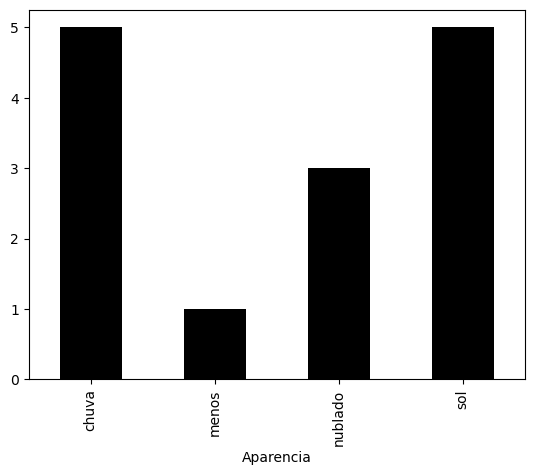

In [7]:
agrupado_aparencia.plot.bar(color = "black")

In [8]:
#Vento
agrupado_vento = dataframe.groupby(dataframe["Vento"]).size()
agrupado_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

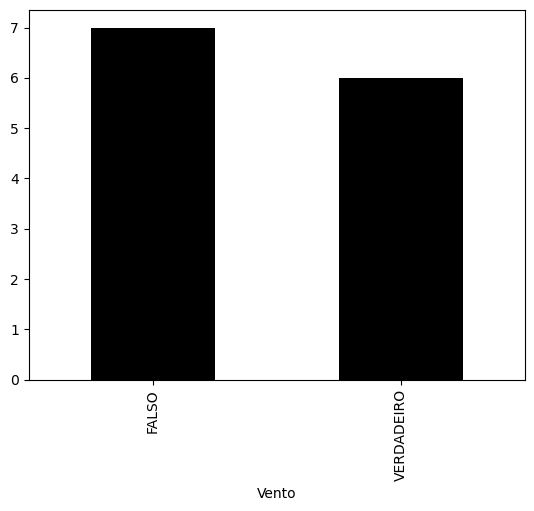

In [9]:
agrupado_vento.plot.bar(color = "black")

In [10]:
#Jogar
agrupado_jogar = dataframe.groupby(dataframe["Jogar"]).size()
agrupado_jogar

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

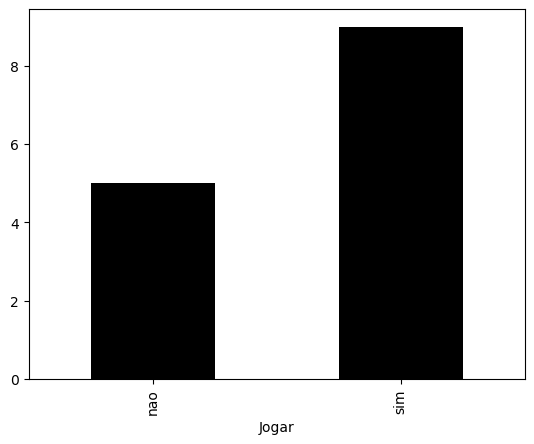

In [11]:
agrupado_jogar.plot.bar(color = "black")

Dados Númericos

In [12]:
#Temperatura
dataframe["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

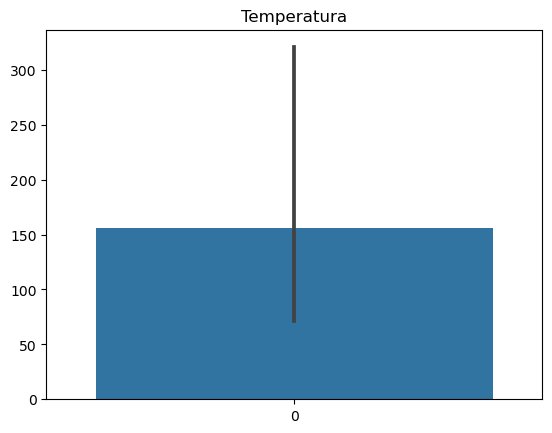

In [13]:
srn.barplot(dataframe["Temperatura"]).set_title("Temperatura")

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temperatura', ylabel='Count'>

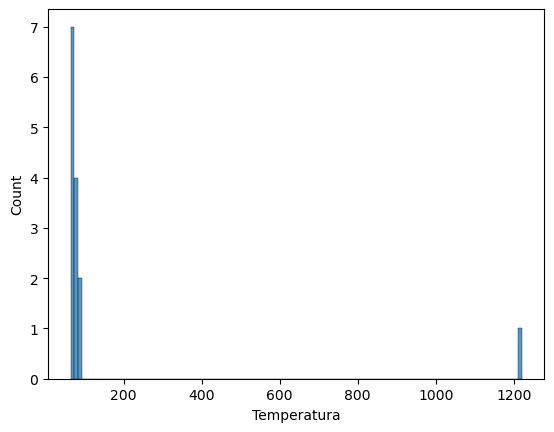

In [14]:
srn.histplot(dataframe["Temperatura"])

In [15]:
#Umidade
dataframe["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

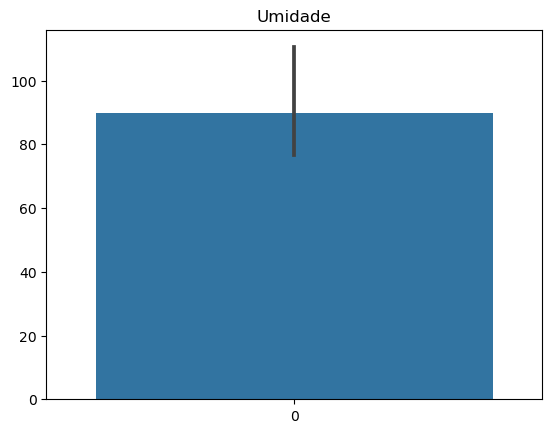

In [16]:
srn.barplot(dataframe["Umidade"]).set_title("Umidade")

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Umidade', ylabel='Count'>

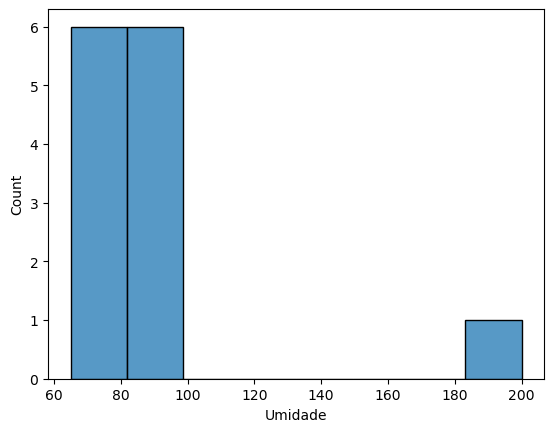

In [17]:
srn.histplot(dataframe["Umidade"])

Limpeza e Tratamento dos Dados

In [18]:
#Busca por valores NAs
dataframe.isnull().sum()

#Umidade, Vento possuem NA

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [19]:
#Umidade
dataframe["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [20]:
median = sts.median(dataframe["Umidade"])
median

85.5

In [21]:
#Trocando o NA pela mediana
dataframe["Umidade"].fillna(median, inplace = True)

In [22]:
#Verificando se ainda tem NAs
dataframe["Umidade"].isnull().sum()

0

In [23]:
#Vento
dataframe.groupby(dataframe["Vento"]).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [24]:
#Trocando o NA pela moda(FALSO)
dataframe.fillna("FALSO", inplace = True)

In [25]:
#Verificando se ainda tem NAs
dataframe["Vento"].isnull().sum()

0

In [26]:
#Verificando dominio da coluna Aparencia
dataframe.groupby(dataframe["Aparencia"]).size()

#dado chamado menos fora do dominio

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [27]:
#Trocando o dado menos pela moda(sol ou chuva)
dataframe.loc[dataframe["Aparencia"] == "menos", "Aparencia"] = "chuva"

In [28]:
#Verificando novamente o dominio
dataframe.groupby(dataframe["Aparencia"]).size()

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [29]:
#Verificar outliers na coluna Temperatura
dataframe.loc[(dataframe["Temperatura"] < -130) | (dataframe["Temperatura"] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [30]:
median = sts.median(dataframe["Temperatura"])
median

73.5

In [39]:
#Trocando o outlier pela mediana
dataframe.loc[(dataframe["Temperatura"] < -130) | (dataframe["Temperatura"] > 130), "Temperatura"] = median

In [32]:
#Verificando se ainda tem outlier
dataframe.loc[(dataframe["Temperatura"] < -130) | (dataframe["Temperatura"] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [33]:
#Verificando se tem outlier na coluna Umidade
dataframe.loc[(dataframe["Umidade"] < 0) | (dataframe["Umidade"] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [34]:
median = sts.median(dataframe["Umidade"])
median

85.25

In [35]:
#Trocando o outlier pela mediana
dataframe.loc[(dataframe["Umidade"] < 0) | (dataframe["Umidade"] > 100), "Umidade"] = median

In [36]:
#Verificando se ainda tem outlier
dataframe.loc[(dataframe["Umidade"] < 0) | (dataframe["Umidade"] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [37]:
dataframe.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
